# Global config

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from cycler import cycler
from matplotlib import patches, ticker
import matplotlib.colors as mcolors

In [2]:
# Reload all modules (except those excluded by %aimport) every time before executing the Python code typed.
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [3]:
# Run this to close all figures*
plt.close("all")

In [4]:
## Global configuration

# constrained_layout automatically adjusts subplots and decorations like legends and colorbars
# so that they fit in the figure window while still preserving, as best they can, the logical
# layout requested by the user. constrained_layout is similar to tight_layout, but uses a constraint
# solver to determine the size of axes that allows them to fit.

linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

# ['#3853a4', '#146533', '#ed1f24', '#708191', '#faa51a', '#b9519f']
# ['#F27970', '#BB9727',  '#54B345', '#32B897', '#05B9E2', '#8983BF']
palette = ['#EE6677', '#4477AA', '#8ECFC9', '#FFBE7A', '#BEB8DC', '#E7DAD2']
patterns = ["", "/" , "\\" , "x", ".", "o"] #  "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1, 1, 1)), (5, (10, 3))]
markers = ['v', '*', '.', 's', '1', 'x']

plt.rcParams["figure.constrained_layout.use"] = True

plt.rcParams['figure.figsize'] = [4.0, 3.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 18
plt.rcParams["font.family"] = "Arial"
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'white'
plt.rcParams['legend.framealpha'] = 0.9
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.rcParams['axes.prop_cycle'] = cycler(color=palette) + cycler(linestyle=linestyles)

In [5]:
transparency = 0.5

def get_transparent_color(color):
    c = mcolors.hex2color(color)
    c = tuple(map(lambda x: x*transparency + (1.0-transparency), mcolors.hex2color(c)))
    hex_color = '#{:02X}{:02X}{:02X}'.format(int(c[0] * 255), int(c[1] * 255), int(c[2] * 255))
    return hex_color

# `colors` for border lines and `colors_fill` for filled areas
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors_fill = list(map(get_transparent_color, colors))

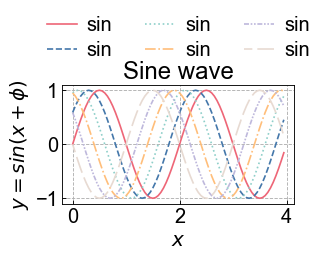

In [43]:
x = np.arange(0, 4, 0.05)

fig, ax = plt.subplots()
fig.set_size_inches((4, 3))

ax.plot(x, np.sin(x*np.pi), label='sin')
ax.plot(x, np.sin((x+0.2)*np.pi), label='sin')
ax.plot(x, np.sin((x+0.4)*np.pi), label='sin')
ax.plot(x, np.sin((x+0.6)*np.pi), label='sin')
ax.plot(x, np.sin((x+0.8)*np.pi), label='sin')
ax.plot(x, np.sin((x+1.0)*np.pi), label='sin')

ax.set_xlabel('$x$')
ax.set_ylabel('$y = sin(x + \phi)$')
ax.set_title('Sine wave')

ax.grid(True)

ax.legend(loc='upper center', frameon=False, bbox_to_anchor=(-0.1, 1.5, 1.2, 0.15),
          ncol=6 / 2, borderaxespad=0, handlelength=1.5, mode="expand",
          handletextpad=0.5, columnspacing=1, labelspacing=0.3)

plt.savefig('example/hello.pdf')

## Line Chart

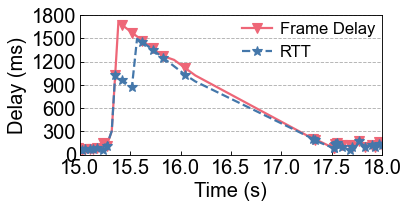

In [29]:
raw_data = pd.read_csv('example/bursty.csv', header=0)

metrics = ['delay', 'rtt']
labels = ['Frame Delay', 'RTT']

timeline = np.array(raw_data['ms'].tolist()) / 1000
ylines = []
for i in range(len(metrics)):
    ylines.append(np.array(raw_data[metrics[i]].tolist()))

fig, ax = plt.subplots()
fig.set_size_inches((5, 2.5))

for i in range(len(metrics)):
    ax.plot(timeline, ylines[i], label=labels[i], linewidth=2, 
            marker=markers[i], markersize=9, markevery=2)

ax.set_xlim(15, 18)
ax.set_ylim(0, 1800)
ax.set_xticks(np.arange(15, 18 + 0.5, 0.5))
ax.set_yticks(np.arange(0, 1800 + 300, 300))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Delay (ms)')

ax.grid(True, axis='y')

ax.legend(loc='upper right', frameon=False,
          ncol=1, borderaxespad=0, handlelength=1.8, 
          handletextpad=0.5, columnspacing=2.0, fontsize="small")

plt.savefig('example/line.pdf')

## Timeline

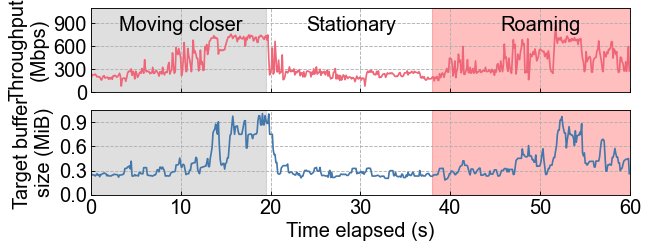

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 3), constrained_layout=False)
# fig.tight_layout()
# plt.subplots_adjust(hspace=0.5, wspace=3)

for ax in fig.get_axes():
    ax.label_outer()

thr = np.loadtxt('example/timeline/throughput.log')
buf = np.loadtxt('example/timeline/buf.log')

s = 623
l = 600
thr = thr[s:s+l] / 10**6 * 80
buf = buf[s:s+l] / 1025**2

x = np.arange(l)/10

empty_len = 0

ax1.set_ylabel("Throughput\n(Mbps)")
ax1.plot(x, thr, '-')
ax1.set_xlim(0-empty_len, 60+empty_len)
ax1.set_yticks(np.arange(0, 1200, 300))
ax1.set_ylim(0, 1100)

# ax2 = ax1.twinx()
ax2.set_ylabel("Target buffer\nsize (MiB)")
ax2.plot(x, buf, '-', color=colors[1])
ax2.set_xlabel("Time elapsed (s)")
ax2.set_xlim(0-empty_len, 60+empty_len)
ax2.set_yticks(np.arange(0, 1.2, 0.3))

ax1.grid(True)
ax2.grid(True)

def span(start, end, color, alpha):
    ax1.axvspan(start, end, color=color, alpha=alpha)
    ax2.axvspan(start, end, color=color, alpha=alpha)

span(0, 19.5, 'gray', 0.25)
span(38, 60, 'red', 0.25)

ax1.text(10, 800, 'Moving closer', horizontalalignment='center')
ax1.text(29, 800, 'Stationary', horizontalalignment='center')
ax1.text(50, 800, 'Roaming', horizontalalignment='center')

plt.savefig('example/timeline.pdf')

# CDF


## Multiple Files

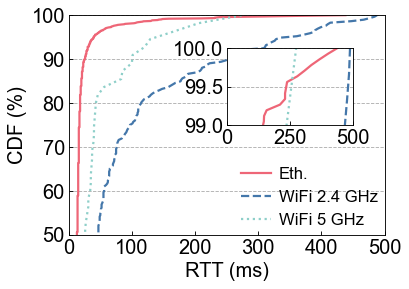

In [11]:
# from multiple files

N = 3
xlimit = 500
xstep = 100
ystep = 10

xlines = []
cdfs = []

# prepare CDFs
for i in range(N):
    raw_data = pd.read_csv(f'example/low-bitrate/{i}.csv', header=None, usecols=[3,], names=['rtt'])
    data = np.sort(np.array(raw_data.query("rtt <= @xlimit")['rtt'].tolist())) # filter values out of scope
    xlines.append(data)
    pdf = np.full((len(data), ), 1 / len(data) * 100) # sorted percentile
    cdfs.append(np.cumsum(pdf))

fig, ax = plt.subplots()
fig.set_size_inches((5, 3.5))

labels = ['Eth.', 'WiFi 2.4 GHz', 'WiFi 5 GHz']
for i in range(N):
    ax.plot(xlines[i], cdfs[i], label=labels[i], linewidth=2)

ax.set_xlim(0 ,xlimit)
ax.set_ylim(50, 100)
ax.set_xticks(np.arange(0, xlimit + xstep, xstep))
ax.set_yticks(np.arange(50, 100 + ystep, ystep))
ax.set_xlabel('RTT (ms)')
ax.set_ylabel('CDF (%)')

ax.grid(True, axis='y')

ax.legend(loc='lower right', frameon=False,
          ncol=1, borderaxespad=0, handlelength=1.8, 
          handletextpad=0.5, columnspacing=2.0, fontsize="small")

# subplot inside graph
ins = ax.inset_axes([0.5,0.5,0.40,0.35]) # [x, y, width, height]
for i in range(N):
    ins.plot(xlines[i], cdfs[i], label=labels[i], linewidth=2)
ins.set_xlim(0, xlimit)
ins.set_ylim(99, 100)
ins.set_xticks(np.arange(0, xlimit + 250, 250))
ins.set_yticks(np.arange(99, 100 + 0.5, 0.5))
ins.grid(True, axis='y')


plt.savefig('example/cdf1.pdf')

## Single 

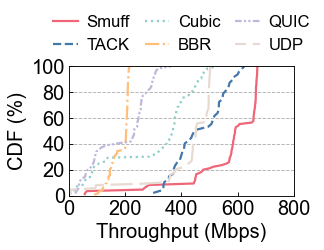

In [12]:
# from a single file

xlimit = 800
xstep = 200
ystep = 20

xlines = []
cdfs = []

methods = ['smart', 'tack', 'cubic', 'bbr', 'quic', 'udp']
N = len(methods)

# prepare CDFs
raw_data = pd.read_csv('example/perf.csv')
for i in range(N):
    name = methods[i]
    data = np.sort(np.array(raw_data.query("method == @name")['throughput'].tolist()))
    xlines.append(data)
    pdf = np.full((len(data), ), 1 / len(data) * 100) # sorted percentile
    cdfs.append(np.cumsum(pdf))

fig, ax = plt.subplots()
fig.set_size_inches((4, 3))

labels = ['Smuff', 'TACK', 'Cubic', 'BBR', 'QUIC', 'UDP']
for i in range(N):
    ax.plot(xlines[i], cdfs[i], label=labels[i], linewidth=2)

ax.set_xlim(0 ,xlimit)
ax.set_ylim(0, 100)
ax.set_xticks(np.arange(0, xlimit + xstep, xstep))
ax.set_yticks(np.arange(0, 100 + ystep, ystep))
ax.set_xlabel('Throughput (Mbps)')
ax.set_ylabel('CDF (%)')

ax.grid(True, axis='y')

# bbox_to_anchor=(x, y, width, height)
ax.legend(loc='upper center', frameon=False, bbox_to_anchor=(-0.1, 1.3, 1.2, 0.15),
          ncol=N / 2, borderaxespad=0, handlelength=1.5, mode="expand",
          handletextpad=0.5, columnspacing=2.0, fontsize="small")

plt.savefig('example/cdf2.pdf')

# Boxplot

['bbr', 'cubic', 'quic', 'smart', 'tack', 'udp']


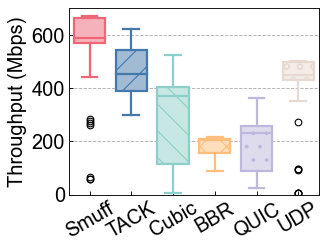

In [13]:
raw_data = pd.read_csv("example/perf.csv", header=0)

# show method keys
print(list(raw_data.groupby("method").groups.keys()))

methods = ['smart', 'tack', 'cubic', 'bbr', 'quic', 'udp']
N = len(methods)
M = len(patterns)

data = []
for i in range(N):
    name = methods[i]
    data.append(raw_data.query("method == @name")['throughput'].tolist())
    

fig, ax = plt.subplots()
fig.set_size_inches((4, 3))

for i in range(N):
    boxplot1 = ax.boxplot([data[i]], widths=0.75, positions=[i], patch_artist=True,
                          boxprops={
                              'edgecolor': colors[i%M],
                              'facecolor': colors_fill[i%M],
                              'linewidth': 2,
                              'hatch': patterns[i%M],
                          },
                          medianprops={ 'color': colors[i%M], 'linewidth': 2 },
                          whiskerprops={ 'color': colors[i%M], 'linewidth': 2 },
                          capprops={ 'color': colors[i%M], 'linewidth': 2 },
                         )
    
ax.set_ylabel("Throughput (Mbps)")
ax.grid(axis='y')
ax.set_ylim(0)

ax.set_xticks( np.arange(N), ["Smuff", "TACK", "Cubic", "BBR", "QUIC", "UDP"], rotation=30)

plt.savefig('example/boxplot.pdf')

# Histogram

## Stacked

usr [0.2104082         nan 0.21385364 0.18768666 0.95272671 0.14283055]
sys [7.17240267        nan 5.03266075 4.32934306 5.35988042 5.34843672]
irq [1.82081978        nan 3.01716118 3.49544873 2.28378482 1.45266811]


/var/folders/x8/7fw14xvd26g9fmh5dwhptm040000gn/T/ipykernel_72264/361982237.py:38: RuntimeWarning: invalid value encountered in divide
  y = breakdown_times[i] / total_times * 100


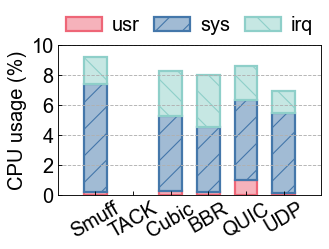

In [17]:
raw_data = pd.read_csv("example/perf.csv", header=0)

N = 6
M = 3

methods = {
    "smart": 0,
    "tack": 1,
    "cubic": 2,
    "bbr": 3,
    "quic": 4,
    "udp": 5
}

breakdown_times = np.zeros((M, N))
total_times = np.zeros(N)

for (idx, row) in raw_data.iterrows():
    j = methods[row['method']]
    if (not pd.isna(row['time'])) and (not pd.isna(row['usr'])): # handle missing field
        breakdown_times[0, j] += row['usr']
        breakdown_times[1, j] += row['sys']
        breakdown_times[2, j] += row['irq']
        total_times[j] += row['time'] * 1000
    

fig, ax = plt.subplots()
fig.set_size_inches((4, 3))

sys = ['Smuff', 'TACK', 'Cubic', 'BBR', 'QUIC', "UDP"]
bottom = np.zeros(len(sys))

for i, k in enumerate('usr sys irq'.split()):

    # color_rgb = mcolors.hex2color(colors[i])
    # color_rgb = tuple(map(lambda x: x*0.1 + 0.9, color_rgb))

    y = breakdown_times[i] / total_times * 100
    print(k, y)
    bar_plot = ax.bar(sys, y, label=k, width=0.6, bottom=bottom, edgecolor=colors[i], facecolor=colors_fill[i], hatch=patterns[i], linewidth=2)
    bottom += y

ax.legend(bbox_to_anchor=(0.0, 1.1, 1.0, 0.15), loc='upper center',
          ncol=3, mode="expand", borderaxespad=0, handlelength=1.8, 
          handletextpad=0.5, columnspacing=2.0, frameon=False)
ax.set_xticks(range(N), sys, rotation=30)
ax.grid(axis='y')
ax.set_ylabel("CPU usage (%)")
ax.set_yticks(np.arange(0, 11, 2))
ax.set_ylim(None, 10)
ax.set_xlim(-1, N)

plt.savefig('example/hist-stacked.pdf')


## Normal

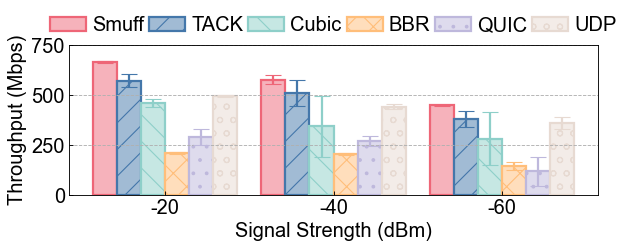

In [27]:
df = pd.read_csv('example/perf.csv')

fig, ax = plt.subplots()
fig.set_size_inches((8, 3))

bar_width = 1
sys = ['Smuff', 'TACK', 'Cubic', 'BBR', 'QUIC', 'UDP']
sys_idx = ['smart', 'tack', 'cubic', 'bbr', 'quic', 'udp']

signal_split = [-30, -50, -70]

for i, s in enumerate(sys_idx):
    x = i + np.arange(len(signal_split)) * 7
    data = [  df[(df['fs'] == 1000000.0) & (df['method'] == s) & 
            (df['signal'] >= signal_high) &  (df['signal'] <= signal_low)]
            for signal_low, signal_high in zip( [0]+signal_split, signal_split)]

    y = [d['throughput'].mean() for d in data] 
    ye = [d['throughput'].std() for d in data]
    
    bar_plot = ax.bar(x, y, width=bar_width, label=sys[i], edgecolor=colors[i], hatch=patterns[i], facecolor=colors_fill[i], linewidth=2)

    ax.errorbar(x, y, ye, elinewidth=2, linestyle='none', capsize=7)


ax.set_xticks( np.arange(3) * 7 + 2.5, [-20,-40,-60] )
ax.set_yticks(np.arange(0, 750 + 250, 250))

ax.legend(bbox_to_anchor=(-0.05, 1.1, 1.1, 0.15), loc='upper center', frameon=False,
          ncol=6, mode="expand", borderaxespad=0, handlelength=1.8, handletextpad=0.3)

ax.set_xlabel("Signal Strength (dBm)")
ax.set_ylabel("Throughput (Mbps)")

ax.grid(axis='y')

plt.savefig('example/histogram.pdf')

# Heatmap

/var/folders/x8/7fw14xvd26g9fmh5dwhptm040000gn/T/ipykernel_72264/600086709.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(lambda i: df.iloc[i]['t'].floor('100ms')).mean()


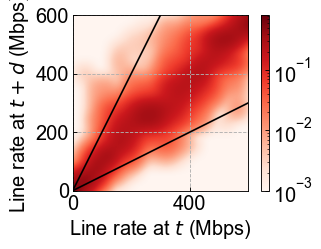

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches((4, 3))

# bytes sent in 100 ms
df = pd.read_csv('example/thresh.log', header=None, names=["raw"])
df['t'] = pd.to_timedelta(df.index / 10, unit='s')
df['throughput'] = df['raw'] / 1000000 * 80
df = df.groupby(lambda i: df.iloc[i]['t'].floor('100ms')).mean()
df['throughput_prev'] = df['throughput'].shift(1)
df = df.reset_index(drop=True)
df = df.drop(0)

bins_size = 40
upper = 666

bin_size = upper//bins_size
bin = np.zeros((bin_size, bin_size))


for index, row in df.iterrows():
    i = row['throughput_prev'] // bins_size
    j = row['throughput']      // bins_size
    if i >= bin_size or j >= bin_size:
        continue
    bin[int(i),int(j)] += 1

column_norms = bin.sum(axis=0)
bin = bin / column_norms

bin += 0.001

import matplotlib
im = ax.imshow(bin, origin='lower', 
               interpolation='bicubic', 
               # cmap="YlGnBu",
               cmap="Reds",
               norm=matplotlib.colors.LogNorm(),
              )

plt.colorbar(im)

ax.set_xlabel("Line rate at $t$ (Mbps)")
ax.set_ylabel("Line rate at $t+d$ (Mbps)")

ax.plot([0, bin_size-1], [0, (bin_size-1)/2], 'k-')
ax.plot([0, (bin_size-1)/2], [0, bin_size-1], 'k-')

def scale_ticks(x, pos):
    return int(x * bins_size)

ax.set_xlim(0, bin_size-1)
ax.set_ylim(0, bin_size-1)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(scale_ticks))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(scale_ticks))
ax.grid(True, axis='both')

plt.savefig('example/heatmap.pdf')